# 训练简单的机器学习分类算法

## Packages Version Check

In [6]:
# sys.path

['..',
 'd:\\000zyf\\Learning\\ML\\pythonml_pytorch_scikit_learn\\ch02',
 'd:\\miniconda\\envs\\ml\\python311.zip',
 'd:\\miniconda\\envs\\ml\\DLLs',
 'd:\\miniconda\\envs\\ml\\Lib',
 'd:\\miniconda\\envs\\ml',
 '',
 'C:\\Users\\10696\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\10696\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\10696\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\10696\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'd:\\miniconda\\envs\\ml\\Lib\\site-packages']

In [4]:
# 将上级目录加入到sys.path中，这里我们的检查环境脚本就放在当前目录，这一步可以不做,
# 可以将上下两个cell中的注释去掉，看看有什么不同
# import sys
# sys.path.insert(0, '..')

In [ ]:
# sys.path

In [5]:
#check your python version and packages version
from python_environment_check import check_packages

d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.24.3
[OK] matplotlib 3.7.2
[OK] pandas 2.1.4


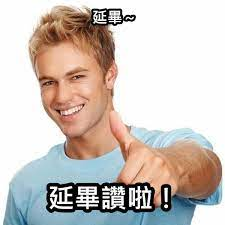

In [9]:
#导入图片，有的话可以试试
from IPython.display import Image
Image(filename='yanbi.jpg')

## 这里介绍两种早期的机器学习算法，**感知机**和**自适应神经元**

In [97]:
import numpy as np
class Perceptron:
    '''Perception classifier.
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    b_ : float
        Bias after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        '''Fit training data.
        Parameters
        ----------
        X:{array-like},shape=[n_examples,n_features]
            Training vectors,where n_examples is the number of examples and n_features is the number of features.
        y:array-like,shape=[n_examples]
            Target values.
        Returns
        -------
        self:object
        '''
        rgen = np.random.RandomState(self.random_state) #创建随机数生成器实例，self.random_state是seed
        #numpy.random.RandomState 对象的 normal 方法。
        # 该方法用于生成服从正态（高斯）分布的随机数。
        #loc：均值；scale：标准差；size：生成随机数的数量
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) #shape[1]是列数，shape[0]是行数,生成权重w和x匹配
        self.b_ = np.float_(0.)
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [61]:
# 空间向量的夹角公式：cosθ=a*b/(|a|*|b|)
v1=np.array([1,2,3])
v2=0.5*v1
np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

## 训练模型

获取鸢尾花数据

In [22]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [72]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

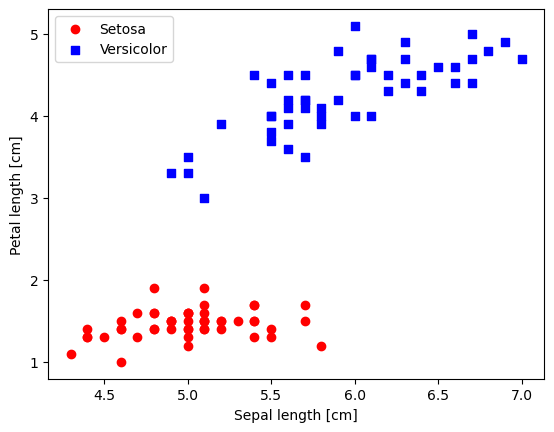

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)#提取标签并进行转化

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values#提取第一个特征列和第三个特征列

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

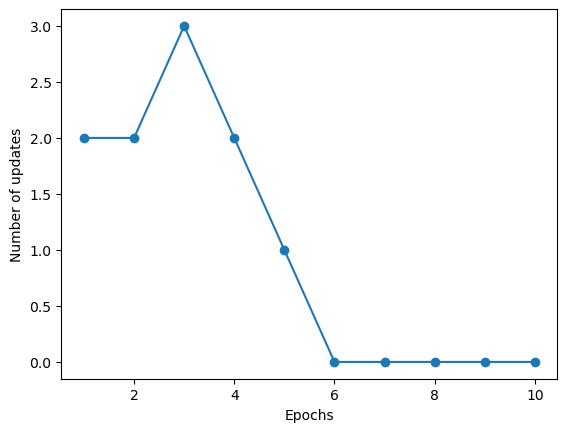

In [98]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()